In [1]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# !pip install pandas-datareader
import pandas_datareader as web

C:\Users\aakas\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
data =  web.DataReader("SBIN.NS","yahoo",dt.datetime(2020,9,1),dt.datetime.now())

In [4]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-01,218.899994,211.199997,213.100006,218.100006,75048313,218.100006
2020-09-02,219.000000,212.300003,218.250000,216.250000,47608088,216.250000
2020-09-03,218.250000,212.300003,217.500000,213.149994,38594129,213.149994
2020-09-04,212.300003,205.899994,210.000000,206.600006,54435758,206.600006
2020-09-07,209.649994,205.399994,207.500000,207.899994,35687359,207.899994
2020-09-08,208.500000,202.899994,207.899994,204.050003,34146789,204.050003
2020-09-09,201.399994,192.500000,201.100006,194.850006,72715826,194.850006
2020-09-10,201.449997,195.199997,197.699997,198.149994,67789617,198.149994
2020-09-11,203.850006,197.000000,198.550003,202.699997,48487971,202.699997


In [5]:
df = data.reset_index()
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [6]:
df.shape

(55, 7)

In [7]:
actual_price = df.tail(1)
actual_price

,Date,High,Low,Open,Close,Volume,Adj Close
54,2020-11-18,247.5,237.899994,239.399994,243.949997,52788275,243.949997


In [8]:
# prepare the data for training the SVR models
df = df.head(len(df)-1)
print(df)

         Date        High         Low        Open       Close     Volume  \
0  2020-09-01  218.899994  211.199997  213.100006  218.100006   75048313   
1  2020-09-02  219.000000  212.300003  218.250000  216.250000   47608088   
2  2020-09-03  218.250000  212.300003  217.500000  213.149994   38594129   
3  2020-09-04  212.300003  205.899994  210.000000  206.600006   54435758   
4  2020-09-07  209.649994  205.399994  207.500000  207.899994   35687359   
5  2020-09-08  208.500000  202.899994  207.899994  204.050003   34146789   
6  2020-09-09  201.399994  192.500000  201.100006  194.850006   72715826   
7  2020-09-10  201.449997  195.199997  197.699997  198.149994   67789617   
8  2020-09-11  203.850006  197.000000  198.550003  202.699997   48487971   
9  2020-09-14  206.199997  197.350006  205.899994  198.500000   63605531   
10 2020-09-15  201.000000  197.100006  199.899994  200.149994   51761038   
11 2020-09-16  200.050003  196.250000  199.850006  198.199997   52404964   
12 2020-09-1

In [9]:
#  Create empty list to store the dependent and independent data
days = []
adj_close_prices = []

In [10]:
# Get the dates and adjusted close prices
df_days = df.loc[:,"Date"]
df_adj_close = df.loc[:,"Adj Close"]
df_days

0    2020-09-01
1    2020-09-02
2    2020-09-03
3    2020-09-04
4    2020-09-07
5    2020-09-08
6    2020-09-09
7    2020-09-10
8    2020-09-11
9    2020-09-14
10   2020-09-15
11   2020-09-16
12   2020-09-17
13   2020-09-18
14   2020-09-21
15   2020-09-22
16   2020-09-23
17   2020-09-24
18   2020-09-25
19   2020-09-28
20   2020-09-29
21   2020-09-30
22   2020-10-01
23   2020-10-05
24   2020-10-06
25   2020-10-07
26   2020-10-08
27   2020-10-09
28   2020-10-12
29   2020-10-13
30   2020-10-14
31   2020-10-15
32   2020-10-16
33   2020-10-19
34   2020-10-20
35   2020-10-21
36   2020-10-22
37   2020-10-23
38   2020-10-26
39   2020-10-27
40   2020-10-28
41   2020-10-29
42   2020-10-30
43   2020-11-02
44   2020-11-03
45   2020-11-04
46   2020-11-05
47   2020-11-06
48   2020-11-09
49   2020-11-10
50   2020-11-11
51   2020-11-12
52   2020-11-13
53   2020-11-17
Name: Date, dtype: datetime64[ns]

In [11]:
# Create the independent dataset 
for i in range(len(df_days)):
  days.append([df.Date.dt.day[i]])
# create the dependent dataset
for j in df_adj_close:
  adj_close_prices.append( float (j))  

In [12]:
print(days)
print(adj_close_prices)

[[1], [2], [3], [4], [7], [8], [9], [10], [11], [14], [15], [16], [17], [18], [21], [22], [23], [24], [25], [28], [29], [30], [1], [5], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [20], [21], [22], [23], [26], [27], [28], [29], [30], [2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [17]]
[218.10000610351562, 216.25, 213.14999389648438, 206.60000610351562, 207.89999389648438, 204.0500030517578, 194.85000610351562, 198.14999389648438, 202.6999969482422, 198.5, 200.14999389648438, 198.1999969482422, 195.4499969482422, 192.60000610351562, 185.8000030517578, 186.1999969482422, 183.8000030517578, 176.35000610351562, 182.1999969482422, 187.25, 185.0500030517578, 185.39999389648438, 190.3000030517578, 188.75, 191.60000610351562, 190.6999969482422, 191.5, 198.3000030517578, 198.6999969482422, 195.6999969482422, 200.0500030517578, 192.85000610351562, 195.9499969482422, 204.0, 203.0500030517578, 203.75, 203.3000030517578, 202.8000030517578, 196.6999969482422, 194.64999389648438, 

In [13]:
# Create the 3 Support Vector Regression Models
# Create and Train a SVR Model using a linear kernel
lin_svr = SVR(kernel="linear",C=1000.0)
lin_svr.fit(days,adj_close_prices)

# Create and Train a SVR Model using a Polynomial kernel
poly_svr = SVR(kernel="poly",C=1000.0,degree=2)
poly_svr.fit(days,adj_close_prices)

# Create and Train a SVR Model using a rbf kernel
rbf_svr = SVR(kernel="rbf",C=1000.0)
rbf_svr.fit(days,adj_close_prices)

SVR(C=1000.0)

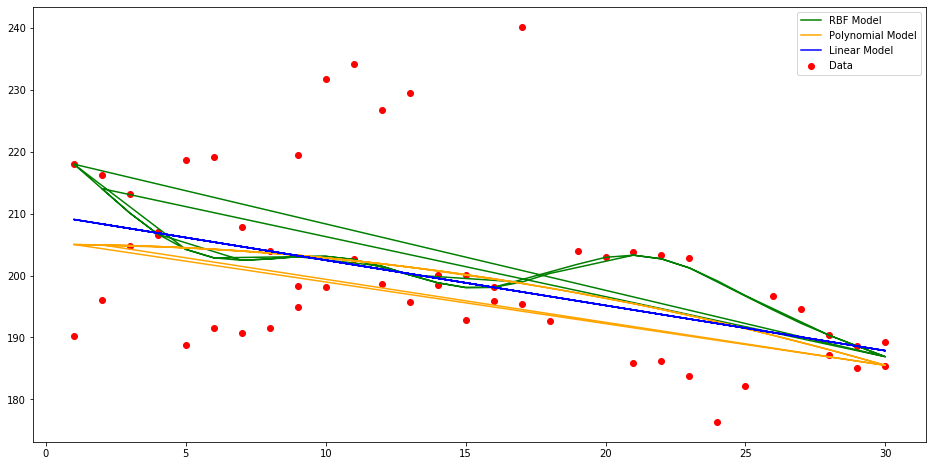

In [14]:
# plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.scatter(days,adj_close_prices,color="red",label="Data")
plt.plot(days,rbf_svr.predict(days),color="green",label="RBF Model")
plt.plot(days,poly_svr.predict(days),color="orange",label="Polynomial Model")
plt.plot(days,lin_svr.predict(days),color="blue",label="Linear Model")
plt.legend()
plt.show()

In [ ]:
rbf_svr.predict([[35]])

array([200.93777493])

In [ ]:
df.Date

0    2020-09-01
1    2020-09-02
2    2020-09-03
3    2020-09-04
4    2020-09-07
5    2020-09-08
6    2020-09-09
7    2020-09-10
8    2020-09-11
9    2020-09-14
10   2020-09-15
11   2020-09-16
12   2020-09-17
13   2020-09-18
Name: Date, dtype: datetime64[ns]